## **EDA on Home Loan Dataset**

### **Phase 1: Data Collection and Preparation**

In [3]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Task 1.1: Load the Home Loan dataset into a Pandas DataFrame.

In [ ]:
# The URL of the raw train data CSV file
url = 'https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv'

# Read the CSV file directly into a pandas DataFrame
df = pd.read_csv(url)
print("Dataset loaded successfully!")
print("\nFirst 5 rows of the DataFrame:")
df.head()


Dataset loaded successfully!

First 5 rows of the DataFrame:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Task 1.2: Inspect the dataset for missing values, duplicates, and data type inconsistencies.

In [5]:
#Getting the count of missing values for every column
print("\nMissing Values Count per Column")
missing_values = df.isnull().sum()
missing_values


Missing Values Count per Column


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Getting the total count of duplicated values
total_duplicates = df.duplicated().sum()
print(f"\nTotal Number of Duplicated values: {total_duplicates}")


Total Number of Duplicated values: 0


In [7]:
# checking the data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# checking the column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Task 1.3: Clean the dataset by handling missing values, correcting data types, and addressing outliers.

In [10]:
df.shape

(614, 13)

In [11]:
# copying the data into a new dataframe 
loan_data = df.copy()

In [12]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
# converting the datatype
# loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].astype(str)

In [15]:
# converting the datatype
# loan_data["Credit_History"] = loan_data["Credit_History"] .astype(str)

In [16]:
# loan_data["Credit_History"] 

In [17]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
loan_data["Credit_History"] = loan_data["Credit_History"].map({1.0:"good", 0.0:"bad"})

In [19]:
categorical = ['Gender','Married','Dependents','Education', 'Self_Employed','Loan_Amount_Term', 'Credit_History']

In [20]:
for col in categorical:
    mode_value = loan_data[col].mode()[0]
    loan_data[col].fillna(mode_value, inplace = True)
    print(f"Filled missing values in '{col}' with Mode: {mode_value}")

Filled missing values in 'Gender' with Mode: Male
Filled missing values in 'Married' with Mode: Yes
Filled missing values in 'Dependents' with Mode: 0
Filled missing values in 'Education' with Mode: Graduate
Filled missing values in 'Self_Employed' with Mode: No
Filled missing values in 'Loan_Amount_Term' with Mode: 360.0
Filled missing values in 'Credit_History' with Mode: good


In [21]:
# filling the missing values with the median of the LoanAmount
median_loan_amount = loan_data['LoanAmount'].median()
loan_data['LoanAmount'].fillna(median_loan_amount, inplace=True)
print(f"filling the missing values with the median of the loan amount: {median_loan_amount}")

filling the missing values with the median of the loan amount: 128.0


In [22]:
# numerical_cols=loan_data.select_dtypes(include=["int64","Float64"]).columns

In [23]:
# numerical_cols

In [24]:
numerical_cols = ['ApplicantIncome', 'LoanAmount','CoapplicantIncome']

In [25]:
for col in numerical_cols:
    median_value = loan_data[col].median()
    loan_data[col].fillna(median_value, inplace = True)
    print(f"Filled missing values in '{col}' with Median: {median_value}")

Filled missing values in 'ApplicantIncome' with Median: 3812.5
Filled missing values in 'LoanAmount' with Median: 128.0
Filled missing values in 'CoapplicantIncome' with Median: 1188.5


In [26]:
# checking for the missing data filling if complete
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
#removing the + from 3+ to ensure the data is clean
loan_data['Dependents'] = loan_data['Dependents'].str.replace('+', '')

#Converting to integer datatype
loan_data['Dependents'] =(loan_data['Dependents']).astype('int64')

In [28]:
# categorical = loan_data.select_dtypes(include="object").columns

In [29]:
categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History']

In [30]:
# for col in categorical:
#     mode_value = loan_data[col].mode()[0]
#     loan_data[col].fillna(mode_value, inplace = True)
#     print(f"Filled missing values in '{col}' with Mode: {mode_value}")

In [31]:
# converting the data type of this columns to category
# categorical = ['Gender','Married','Education','Self_Employed','Property_Area','Credit_History','Loan_Status']

for col in categorical:
    loan_data[col] = loan_data[col].astype('category')
    print(f"Converted '{col}' datatype to type: {loan_data[col].dtype}")

Converted 'Gender' datatype to type: category
Converted 'Married' datatype to type: category
Converted 'Dependents' datatype to type: category
Converted 'Education' datatype to type: category
Converted 'Self_Employed' datatype to type: category
Converted 'Loan_Amount_Term' datatype to type: category
Converted 'Credit_History' datatype to type: category


In [32]:
loan_data.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term     category
Credit_History       category
Property_Area          object
Loan_Status            object
dtype: object

In [33]:
# Calculating Outlier Boundaries using (IQR Method) 

# Defining the numerical columns we want to check for outliers
numerical_cols = ['ApplicantIncome', 'LoanAmount','CoapplicantIncome']
outlier_columns = []

for col in numerical_cols:
    print(f"\nAnalyzing the numerical columns: {col}")

    # Calculating Quartiles and IQR
    Q1 = loan_data[col].quantile(0.25)
    Q3 = loan_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Defining the bounds (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying the number of outliers
    outliers_upper = loan_data[col] > upper_bound
    outliers_lower = loan_data[col] < lower_bound
   

    print(f"Q1 (25th percentile): {Q1:.2f}")
    print(f"Q3 (75th percentile): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}\n")
    print(f"Upper Bound: {upper_bound:.2f}\n")
    print(f"Lower Bound: {lower_bound:.2f}")

    # Display counts of outliers
    total_outliers = len(outliers_upper) + len(outliers_lower)
    print(f"\nTotal Outliers Detected: {total_outliers} rows.")
    
    outlier_count = ((outliers_upper) | (outliers_lower)).sum()
    if outlier_count > 0:
        outlier_columns.append(col)
 
    # Showing a sample of the outliers
    # if len(outliers_upper) > 0:
    #     print(f"Sample of {col} Upper Outliers:")
    #     print(outliers_upper[[col]].sort_values(by=col, ascending=False).head(3))



Analyzing the numerical columns: ApplicantIncome
Q1 (25th percentile): 2877.50
Q3 (75th percentile): 5795.00
IQR: 2917.50

Upper Bound: 10171.25

Lower Bound: -1498.75

Total Outliers Detected: 1228 rows.

Analyzing the numerical columns: LoanAmount
Q1 (25th percentile): 100.25
Q3 (75th percentile): 164.75
IQR: 64.50

Upper Bound: 261.50

Lower Bound: 3.50

Total Outliers Detected: 1228 rows.

Analyzing the numerical columns: CoapplicantIncome
Q1 (25th percentile): 0.00
Q3 (75th percentile): 2297.25
IQR: 2297.25

Upper Bound: 5743.12

Lower Bound: -3445.88

Total Outliers Detected: 1228 rows.


In [34]:
def clean_outliers(data, i):
     # Calculating Quartiles and IQR
    Q1 = loan_data[col].quantile(0.25)
    Q3 = loan_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Defining the bounds (1.5 * IQR rule)
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data.loc[:, i] = np.where((data.loc[:, i] < lower) | (data.loc[:, i] > upper), 
                       data[i].clip(lower = lower, upper = upper).astype(data[i].dtype), data[i])
    return data

for i in outlier_columns:
    loan_data = clean_outliers(loan_data, i)

loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5743,0.0,128.0,360.0,good,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,good,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,good,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,good,Urban,Y
4,LP001008,Male,No,0,Graduate,No,5743,0.0,141.0,360.0,good,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,good,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,good,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,5743,240.0,253.0,360.0,good,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,5743,0.0,187.0,360.0,good,Urban,Y


In [35]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### **Phase 2: Exploratory Data Analysis (EDA)**

### Task 2.1: Conduct descriptive statistics to summarize the key characteristics of the data.



In [36]:
print("\nDescriptive Statistics for Numerical Features")
numerical = loan_data.select_dtypes(include=['float64', 'int64']).columns
loan_data[numerical].describe().T


Descriptive Statistics for Numerical Features


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,3978.021173,1390.331970,150.0,2877.50,3812.5,5743.00,5743.000
CoapplicantIncome,614.0,1419.702231,1624.605892,0.0,0.00,1188.5,2297.25,5743.125
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.000


In [37]:
print("\nDescriptive Statistics for Categorical Features")
categorical_summary = loan_data.select_dtypes(include=["category"]).columns
loan_data[categorical_summary].describe().T


Descriptive Statistics for Categorical Features


,count,unique,top,freq
Gender,614,2,Male,502
Married,614,2,Yes,401
Dependents,614,4,0,360
Education,614,2,Graduate,480
Self_Employed,614,2,No,532
Loan_Amount_Term,614.0,10.0,360.0,526.0
Credit_History,614,2,good,525


### Task 2.2: Visualize distributions of numerical features (e.g., applicant income, loan amount) using histograms and box plots.

In [38]:

def univariate_numerical_eda(loan_data, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    print(f" Feature: {column}")
    print("="*40)
    
    print(loan_data[column].describe().to_frame())
    print(f"\nSkewness: {loan_data[column].skew():.3f}")
    print(f"Kurtosis: {loan_data[column].kurt():.3f}")
    
    # Plotting the histogram and boxplot
    plt.figure(figsize=(14,5))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(loan_data[column], kde=True, bins=30, color='#4C72B0')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=loan_data[column], color='#DD8452')
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Skewness Analysis
    column_skew = loan_data[column].skew()
    
    print("\nSkewness Analysis")
    if abs(column_skew) > 1:
        print(f"{column} is highly skewed.")
    elif abs(column_skew) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")

 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       3978.021173
std        1390.331970
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5743.000000
max        5743.000000

Skewness: -0.092
Kurtosis: -1.125


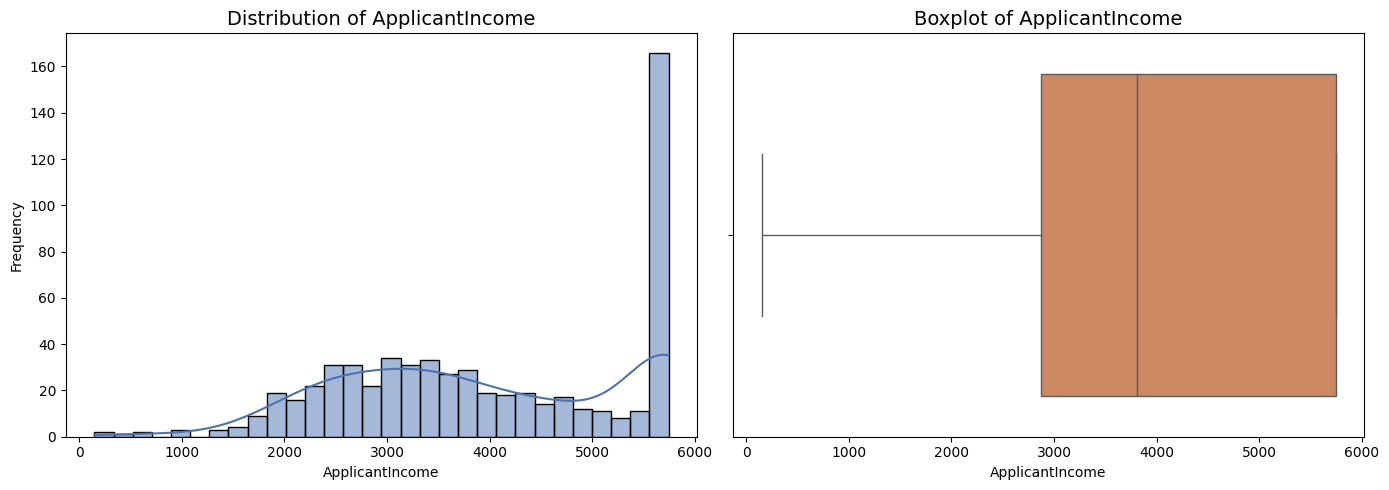


Skewness Analysis
ApplicantIncome is fairly symmetric.
 Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1419.702231
std          1624.605892
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max          5743.125000

Skewness: 1.013
Kurtosis: 0.245


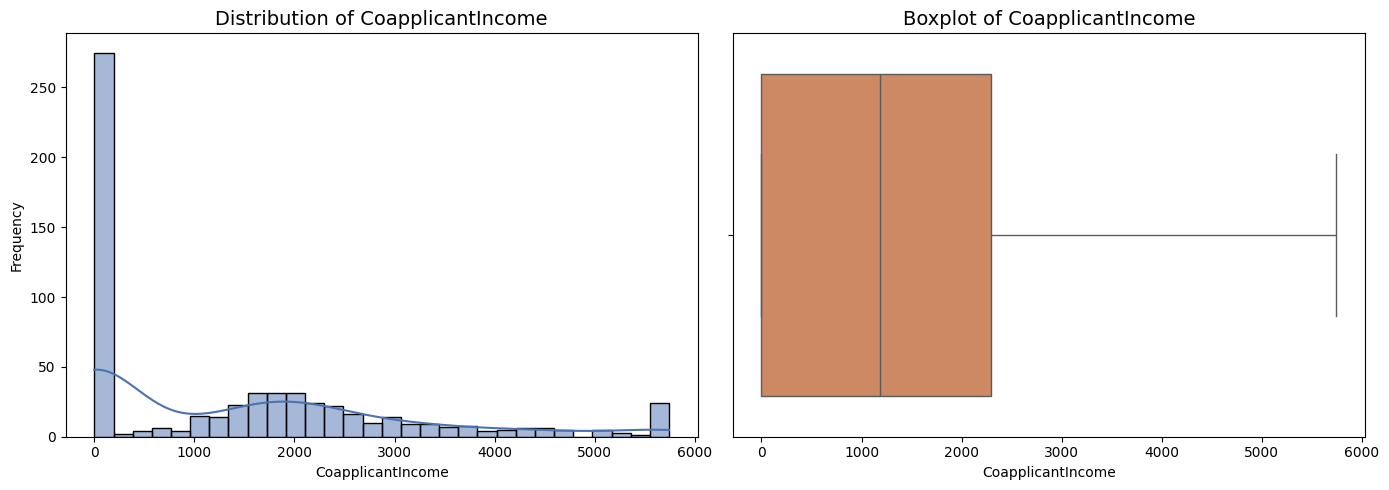


Skewness Analysis
CoapplicantIncome is highly skewed.
 Feature: LoanAmount
       LoanAmount
count  614.000000
mean   145.752443
std     84.107233
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    700.000000

Skewness: 2.743
Kurtosis: 10.937


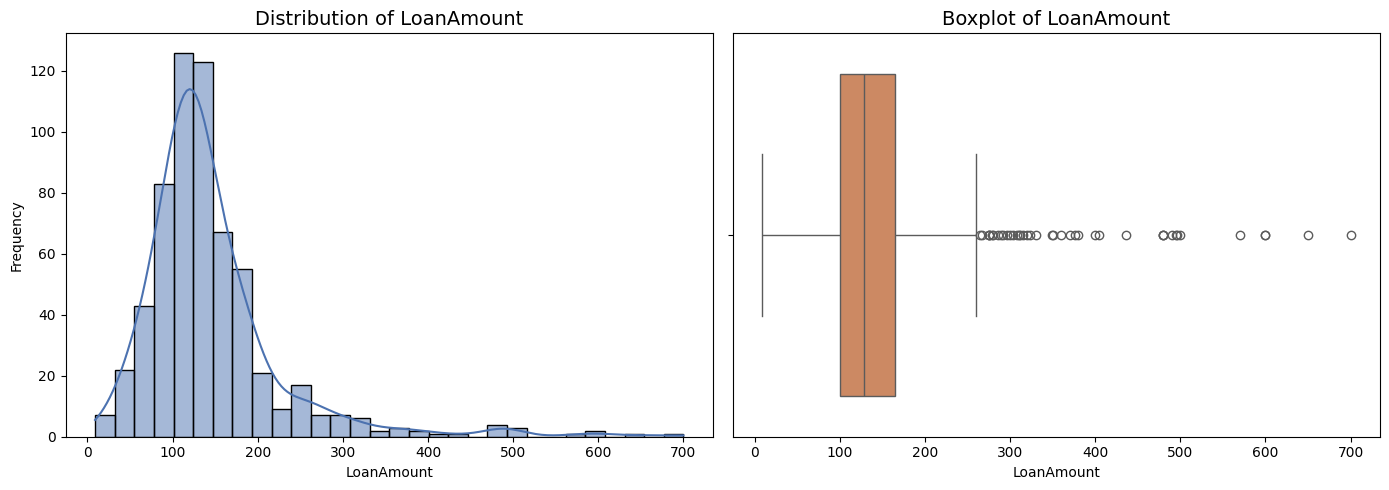


Skewness Analysis
LoanAmount is highly skewed.


In [39]:
for col in numerical:
    univariate_numerical_eda(loan_data, col)

### Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.

In [40]:

def univariate_categorical_eda(loan_data, column):
    """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
    """
    print(f" Feature: {column}")
    print("="*50)
    
    # Calculate counts and percentages
    freq = loan_data[column].value_counts()
    prop = loan_data[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    
    plt.figure(figsize=(14, 6))

    # Subplot 1: Bar Chart (Count Plot)
    plt.subplot(1, 2, 1)
    sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')
    plt.title(f'Count Distribution of {column}', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel(column)

    # Subplot 2: Pie Chart (Percentage Distribution)
    plt.subplot(1, 2, 2)
    plt.pie(prop, labels=freq.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
    plt.title(f'Percentage Distribution of {column}', fontsize=14)
    plt.axis('equal') 
    
    plt.tight_layout()
    plt.show()




 Feature: Gender
        Count  Percentage
Gender                   
Male      502       81.76
Female    112       18.24


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_23092\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


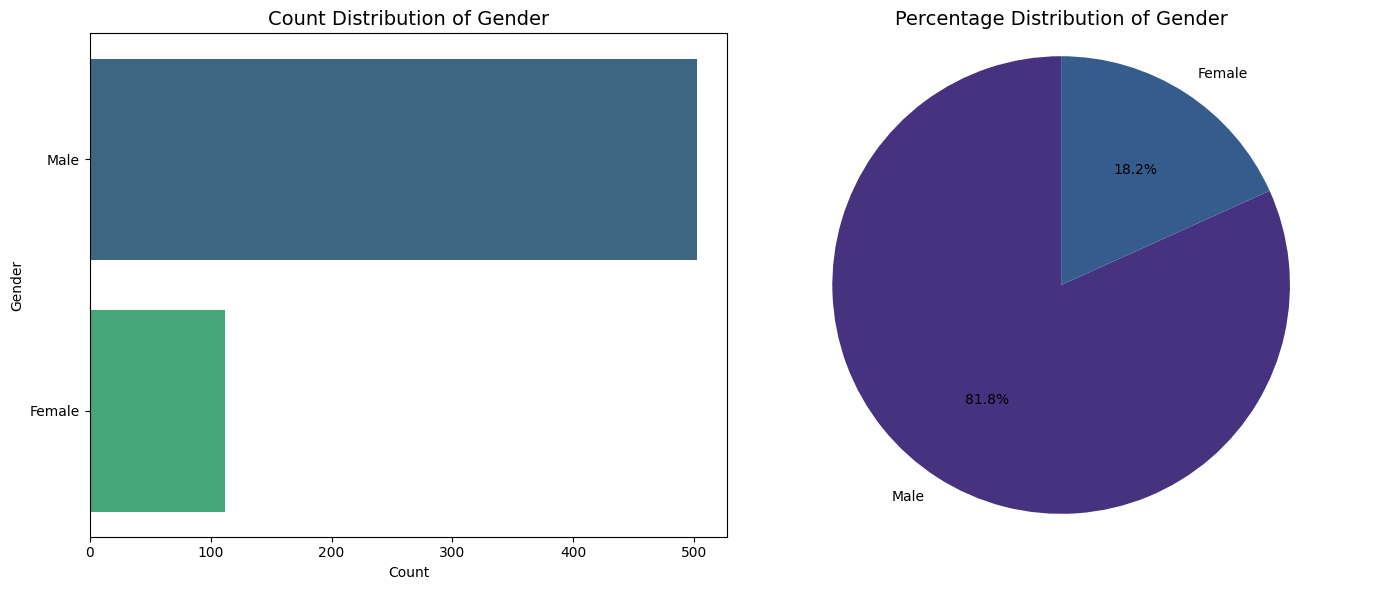

 Feature: Married
         Count  Percentage
Married                   
Yes        401       65.31
No         213       34.69


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_23092\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


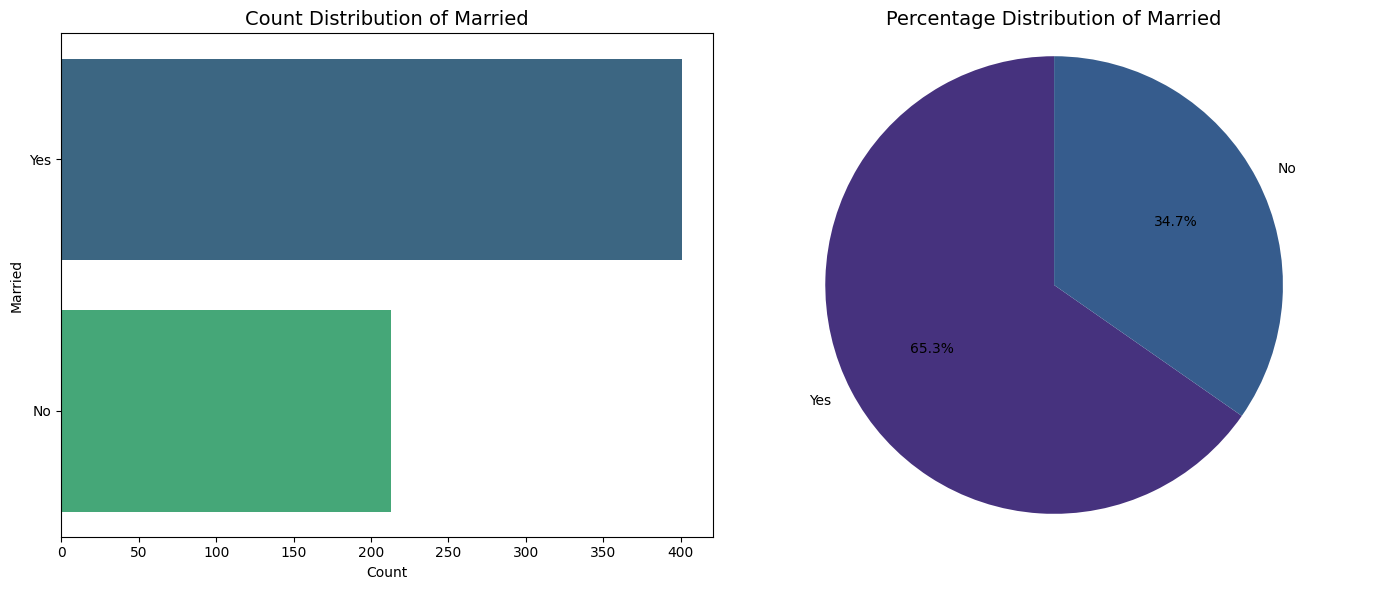

 Feature: Dependents
            Count  Percentage
Dependents                   
0             360       58.63
1             102       16.61
2             101       16.45
3              51        8.31


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_23092\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


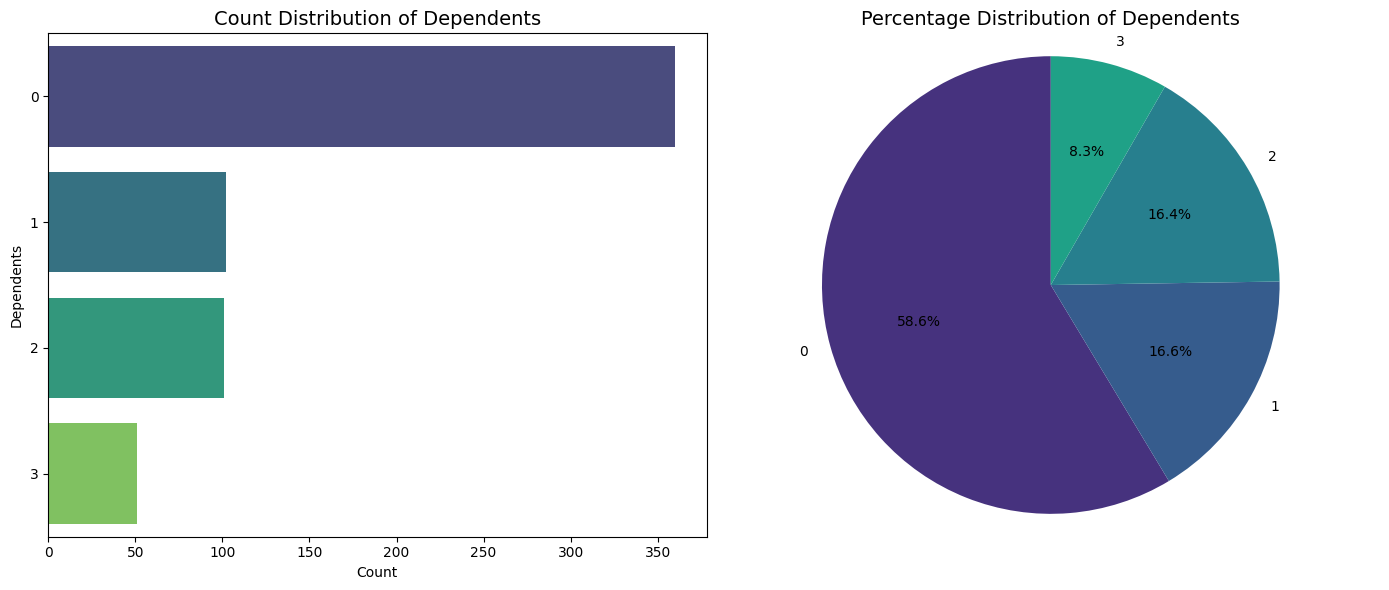

 Feature: Education
              Count  Percentage
Education                      
Graduate        480       78.18
Not Graduate    134       21.82


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_23092\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


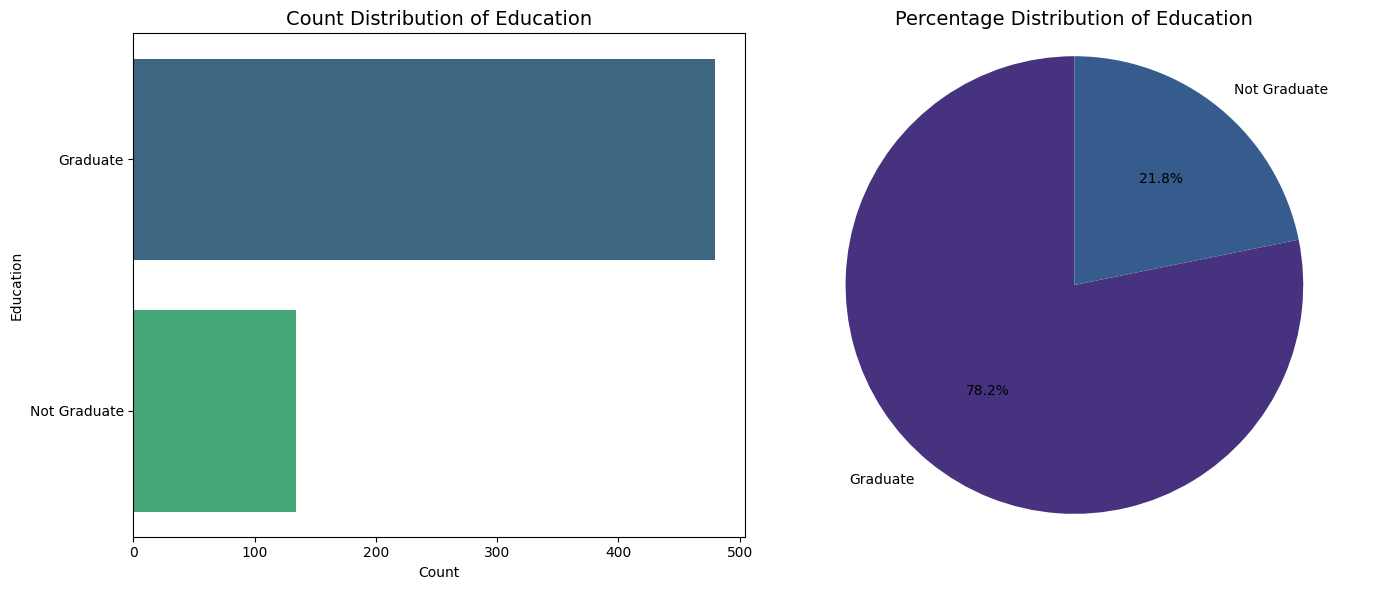

 Feature: Self_Employed
               Count  Percentage
Self_Employed                   
No               532       86.64
Yes               82       13.36


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_23092\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


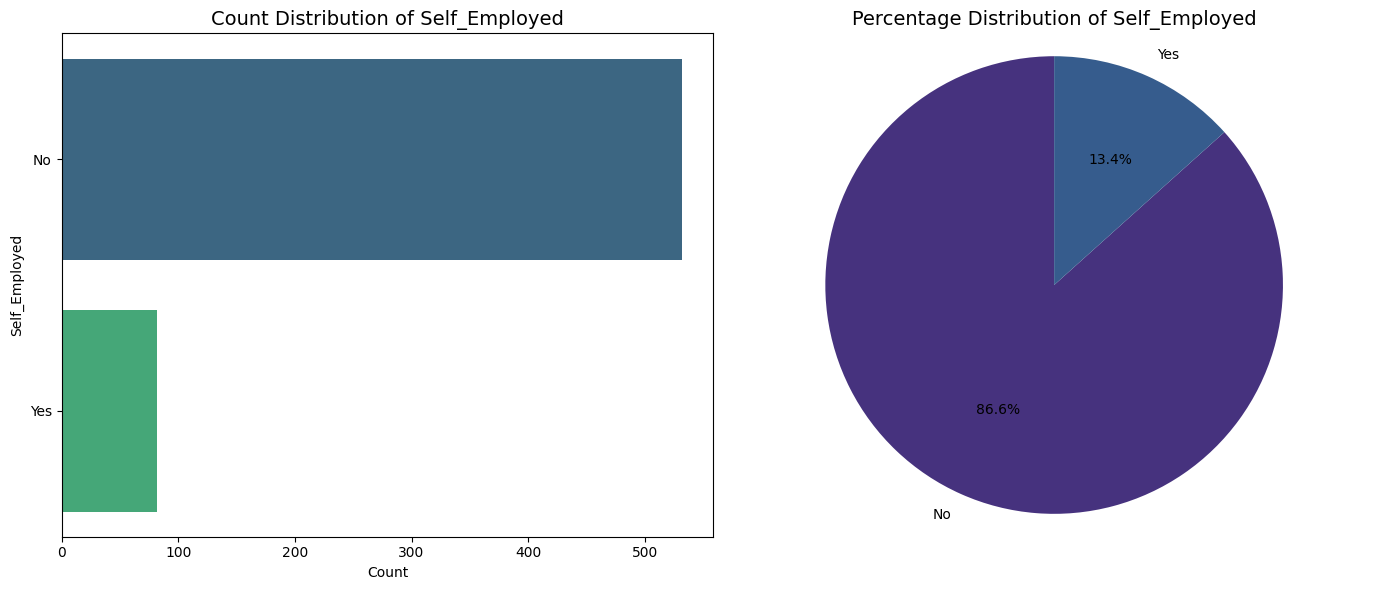

 Feature: Loan_Amount_Term
                  Count  Percentage
Loan_Amount_Term                   
360.0               526       85.67
180.0                44        7.17
480.0                15        2.44
300.0                13        2.12
84.0                  4        0.65
240.0                 4        0.65
120.0                 3        0.49
36.0                  2        0.33
60.0                  2        0.33
12.0                  1        0.16


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_23092\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


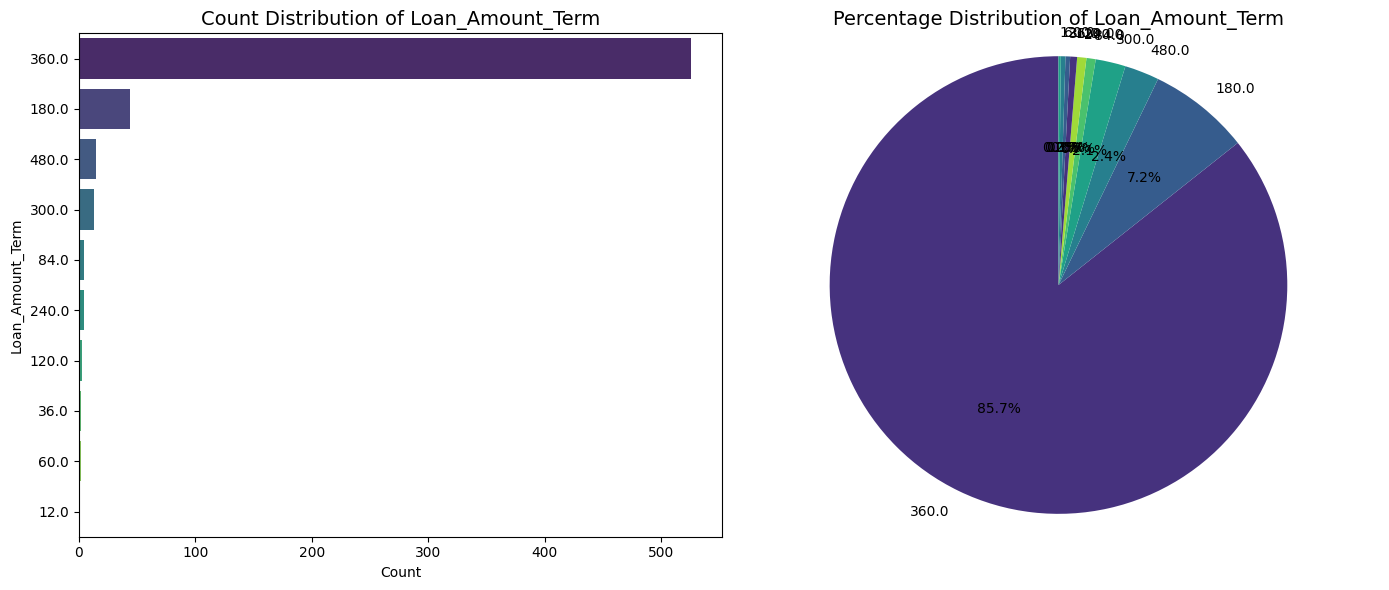

 Feature: Credit_History
                Count  Percentage
Credit_History                   
good              525        85.5
bad                89        14.5


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_23092\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


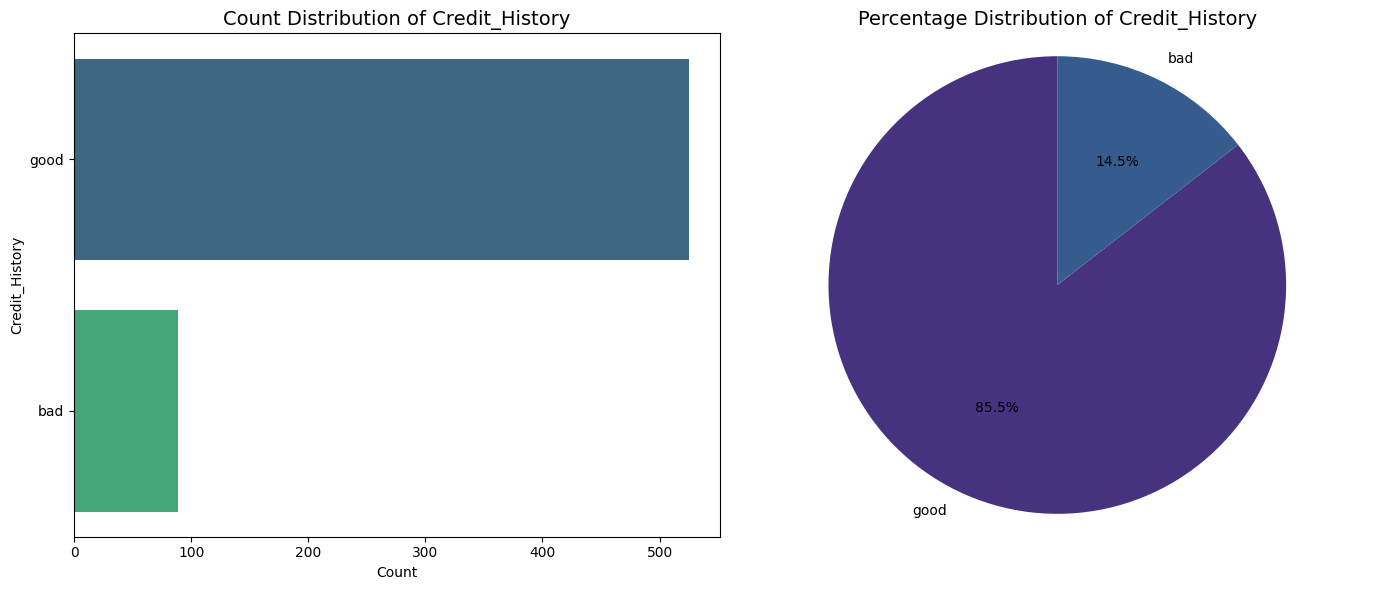

In [41]:
# categorical = ['Gender','Married','Education','Self_Employed','Property_Area','Credit_History','Loan_Status']
for col in categorical:
    univariate_categorical_eda(loan_data, col)

### Task 2.4: Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.

In [42]:
# numerical_cols = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount',]
# numerical_cols = pd.DataFrame(loan_data[numerical_cols])

In [43]:

# def correlation_with_target(loan_data, feature,  target="Loan_Status"):
#     """
#     Plots and summarizes relationship between a numerical feature and a categorical target.
#     """
#     print(f" Feature: {feature} vs {target}")
#     print("="*50)
    
    
#     #group summary 
#     # summary = loan_data.groupby(target[feature]).describe()[["mean","std","min", "max"]]
#     # print(summary)
#     # print()
    
#     plt.figure(figsize=(10,5))
    
#     # boxplot
#     sns.heatmap(x=target,y=feature, data=loan_data, palette="Set2")
#     plt.title(f'{feature} across {target} categories', fontsize=13)
#     plt.xlabel(target)
#     plt.ylabel(feature)
#     plt.show()
    
   

In [44]:
# numerical_cols = ['ApplicantIncome', 'LoanAmount','CoapplicantIncome']
# for col in numerical_cols:
    # correlation_with_target(loan_data, col,target="Loan_Status")

In [45]:
loan_data["Loan_Status"]=loan_data["Loan_Status"].map({"Y":1,"N":0})

In [46]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5743,0.0,128.0,360.0,good,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,good,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,good,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,good,Urban,1
4,LP001008,Male,No,0,Graduate,No,5743,0.0,141.0,360.0,good,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,good,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,good,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,5743,240.0,253.0,360.0,good,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,5743,0.0,187.0,360.0,good,Urban,1


In [47]:
# loan_data["Loan_Status"]

In [48]:
# converting the datatype
# loan_data["Loan_Status"]= loan_data["Loan_Status"].astype('int64')

In [49]:
def correlation_with_target(loan_data, target_col, figsize =(10,3)):
    
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    corrs = loan_data[numerical].corrwith(loan_data[target_col])
    corrs_df =corrs.to_frame(name="corr").T
    
    
    plt.figure(figsize=figsize)
    sns.heatmap(corrs_df,annot=True,fmt=".3f",cmap="coolwarm",center = 0,vmin= -1,vmax=1,cbar_kws={"orientation": "vertical", "shrink":0.7})
    plt.xticks(rotation=45, ha="right")
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f"Correlation of numeric features with {target_col}", fontsize = 12)
    plt.tight_layout()
    plt.show()
    
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index) 

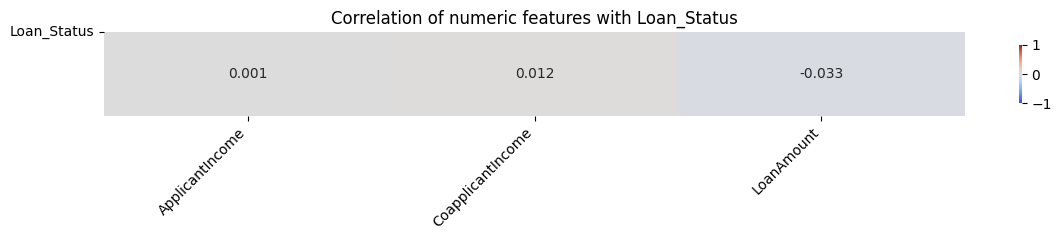

In [50]:
corr_series = correlation_with_target(loan_data, "Loan_Status", figsize=(12, 2.5))

In [51]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(data, x_col, y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """
    if x_col in data.columns and y_col in data.columns:
        # Calculate correlation coefficient
        corr, p_value = pearsonr(loan_data[x_col], loan_data[y_col])

        # Create plot
        plt.figure(figsize=(8, 5))
        sns.regplot(data=loan_data, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
        
        # Title and labels
        plt.title(f"{x_col} vs {y_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
        plt.xlabel(x_col, fontsize=11)
        plt.ylabel(y_col, fontsize=11)
        plt.grid(alpha=0.3)
        plt.show()


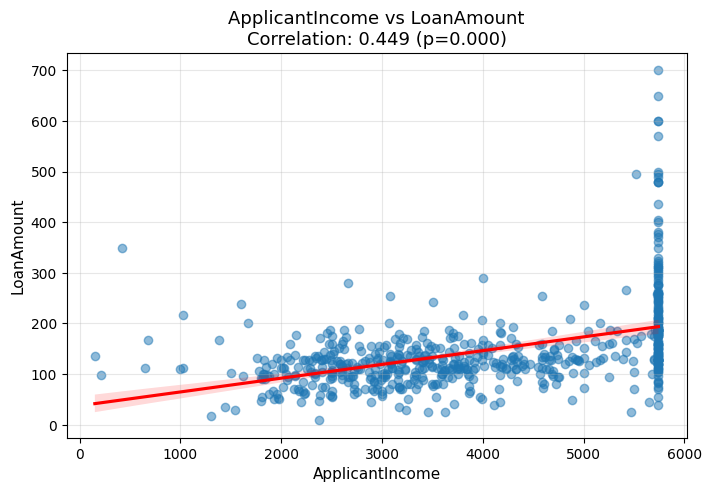

In [52]:
numeric_bivariate_plot(loan_data,  'ApplicantIncome','LoanAmount')

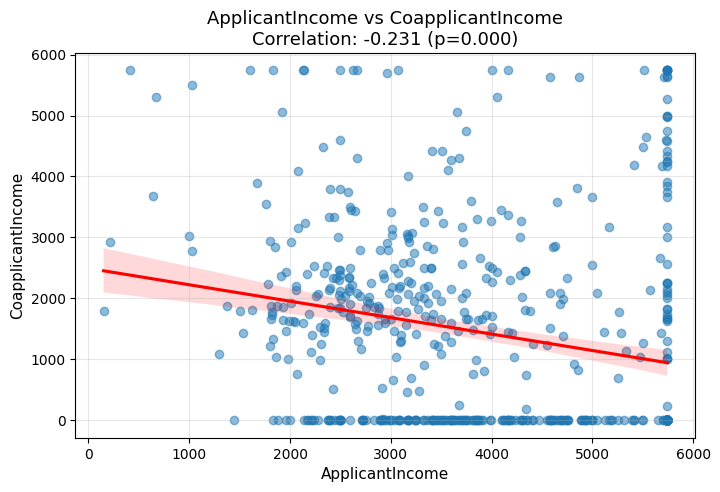

In [53]:
numeric_bivariate_plot(loan_data,  'ApplicantIncome','CoapplicantIncome')


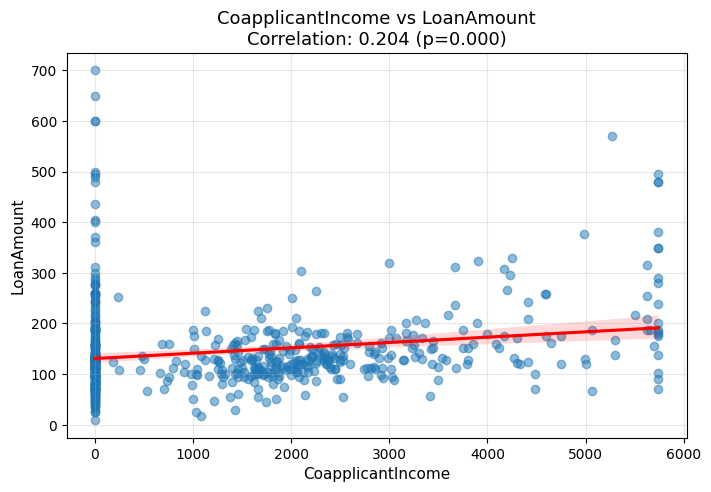

In [54]:
numeric_bivariate_plot(loan_data, 'CoapplicantIncome','LoanAmount')

In [55]:
# cleaned_data

In [57]:
cleaned_data = loan_data.to_csv("home_loan_cleaned.csv", index=False)